# Lab 2. NLP-classifier.
## Task 3 var 12:
## 1. Naive Bayes.
## 2. Neural network with long short-term memory. Nn-LSTM.

### 0. Import libraries

In [81]:
# for data processing
import pandas as pd

# for graphics
import matplotlib.pyplot as plt

# for models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, losses, metrics, optimizers
from tensorflow.keras.models import Sequential

### 1. Data preprocessing

#### 1.1 Psy

In [82]:
import os, fnmatch
files = [file for file in os.listdir('data/') if fnmatch.fnmatch(file, '*.csv')]

In [83]:
Psy_df = pd.read_csv('data/Youtube01-Psy.csv')
Psy_df.drop_duplicates(inplace=True)
Psy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [84]:
Psy_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [85]:
Psy_df.drop('COMMENT_ID', axis=1, inplace=True)

In [86]:
Psy_df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [87]:
Psy_df.isnull().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

In [88]:
Psy_df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,350,350,350,350.000000
unique,345,350,349,NaN
top,Giang Nguyen,2013-11-07T06:20:48,PSY - GANGNAM STYLE (강남스타일) M/V: http://youtu....,NaN
freq,2,1,2,NaN
mean,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,0.500716
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,1.000000


/tmp/ipykernel_13349/4113268658.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


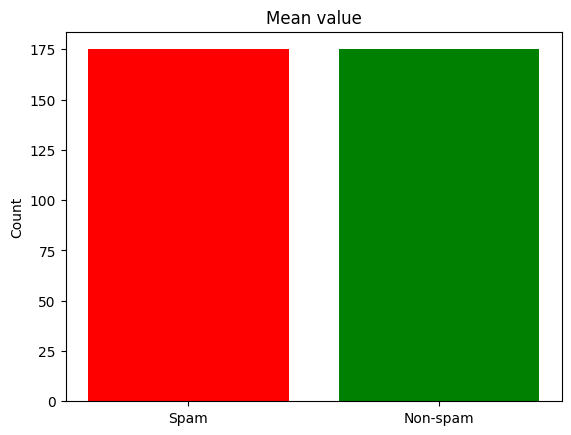

In [89]:
spam_cnt = Psy_df[Psy_df.CLASS == 1].shape[0]
no_spam_cnt = Psy_df[Psy_df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### 1.2 KatyPerry

In [90]:
KatyPerry_df = pd.read_csv('data/Youtube02-KatyPerry.csv')
KatyPerry_df.drop_duplicates(inplace=True)
KatyPerry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [91]:
KatyPerry_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [92]:
KatyPerry_df.drop('COMMENT_ID', axis=1, inplace=True)
KatyPerry_df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [93]:
KatyPerry_df.isnull().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

In [94]:
KatyPerry_df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,350,350,350,350.000000
unique,342,350,348,NaN
top,LuckyMusiqLive,2014-07-22T15:27:50,Katy Perry - Roar (Official): http://youtu.be/...,NaN
freq,4,1,3,NaN
mean,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,0.500716
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,1.000000


/tmp/ipykernel_13349/2410729970.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


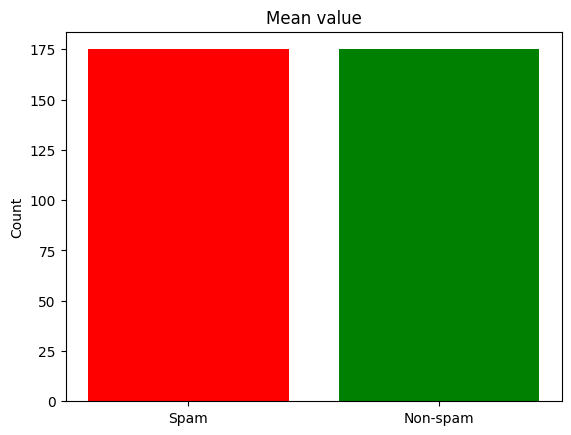

In [95]:
spam_cnt = KatyPerry_df[KatyPerry_df.CLASS == 1].shape[0]
no_spam_cnt = KatyPerry_df[KatyPerry_df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### 1.3. LMFAO

In [96]:
LMFAO_df = pd.read_csv('data/Youtube03-LMFAO.csv')
LMFAO_df.drop_duplicates(inplace=True)
LMFAO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  438 non-null    object
 1   AUTHOR      438 non-null    object
 2   DATE        438 non-null    object
 3   CONTENT     438 non-null    object
 4   CLASS       438 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.2+ KB


In [97]:
LMFAO_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [98]:
LMFAO_df.drop('COMMENT_ID', axis=1, inplace=True)
LMFAO_df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


In [99]:
LMFAO_df.isnull().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

In [100]:
LMFAO_df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,438,438,438,438.000000
unique,420,438,340,NaN
top,Marshmallow Kingdom,2015-05-28T21:39:52.376000,Check out this video on YouTube:﻿,NaN
freq,3,1,74,NaN
mean,NaN,NaN,NaN,0.538813
std,NaN,NaN,NaN,0.499061
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


/tmp/ipykernel_13349/3200778106.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


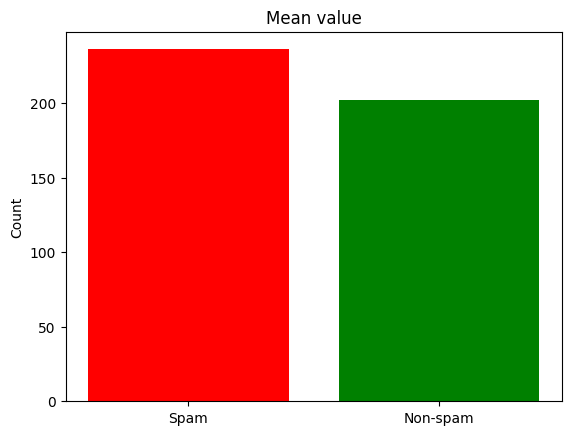

In [101]:
spam_cnt = LMFAO_df[LMFAO_df.CLASS == 1].shape[0]
no_spam_cnt = LMFAO_df[LMFAO_df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### 1.4 Eminem

In [102]:
Eminem_df = pd.read_csv('data/Youtube04-Eminem.csv')
Eminem_df.drop_duplicates(inplace=True)
Eminem_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 0 to 447
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  446 non-null    object
 1   AUTHOR      446 non-null    object
 2   DATE        203 non-null    object
 3   CONTENT     446 non-null    object
 4   CLASS       446 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 20.9+ KB


In [103]:
Eminem_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [104]:
Eminem_df.drop('COMMENT_ID', axis=1, inplace=True)
Eminem_df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [105]:
Eminem_df.isnull().sum()

AUTHOR       0
DATE       243
CONTENT      0
CLASS        0
dtype: int64

In [106]:
Eminem_df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,446,203,446,446.000000
unique,392,203,412,NaN
top,M.E.S,2015-05-29T02:26:10.652000,Check out this video on YouTube:﻿,NaN
freq,8,1,19,NaN
mean,NaN,NaN,NaN,0.544843
std,NaN,NaN,NaN,0.498544
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


/tmp/ipykernel_13349/1133581632.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


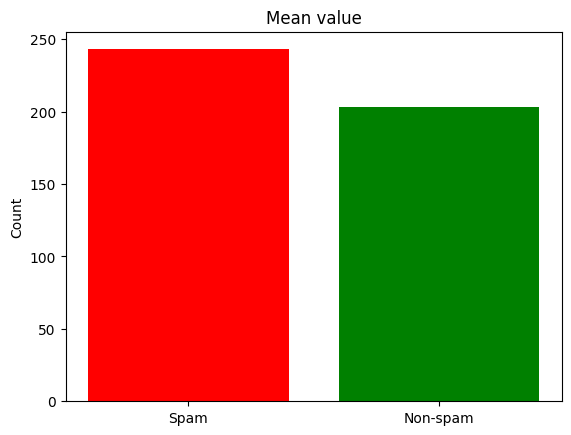

In [107]:
spam_cnt = Eminem_df[Eminem_df.CLASS == 1].shape[0]
no_spam_cnt = Eminem_df[Eminem_df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### 1.5. Shakira

In [108]:
Shakira_df = pd.read_csv('data/Youtube05-Shakira.csv')
Shakira_df.drop_duplicates(inplace=True)
Shakira_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  369 non-null    object
 1   AUTHOR      369 non-null    object
 2   DATE        369 non-null    object
 3   CONTENT     369 non-null    object
 4   CLASS       369 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 17.3+ KB


In [109]:
Shakira_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [110]:
Shakira_df.drop('COMMENT_ID', axis=1, inplace=True)
Shakira_df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [111]:
Shakira_df.isnull().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

In [112]:
Shakira_df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,369,369,369,369.000000
unique,319,369,331,NaN
top,5000palo,2015-05-29T02:30:18.971000,wow,NaN
freq,7,1,4,NaN
mean,NaN,NaN,NaN,0.471545
std,NaN,NaN,NaN,0.499867
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


/tmp/ipykernel_13349/2686406925.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


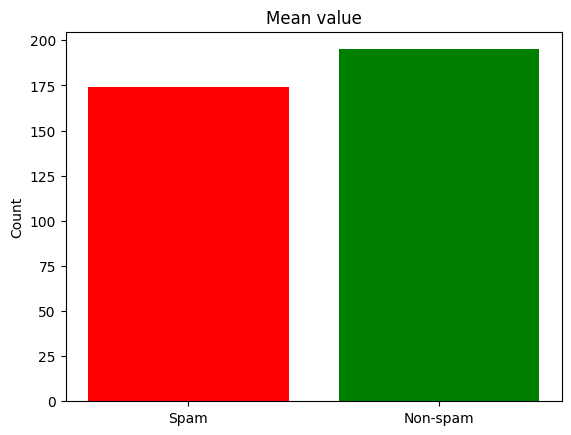

In [113]:
spam_cnt = Shakira_df[Shakira_df.CLASS == 1].shape[0]
no_spam_cnt = Shakira_df[Shakira_df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### 1. Выводы: Во всех пяти табличках структура одинакова, данных немного ~400 записей.
#### * COMMENT_ID - не информативен.
#### * DATE и AUTHOR можно рассмотреть для пущего результату.
#### * CONTENT - основной признак для работы.
#### // DATE в Eminem пропущены 50%, можно сгенерировать средние на основе объединения.
#### Объединяем все таблички в одну. Будем работать со всеми данными.

### 2. Merge full data

In [114]:
df = pd.concat([Psy_df, KatyPerry_df, LMFAO_df, Eminem_df, Shakira_df], ignore_index=True, verify_integrity=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   AUTHOR   1953 non-null   object
 1   DATE     1710 non-null   object
 2   CONTENT  1953 non-null   object
 3   CLASS    1953 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 61.2+ KB


In [115]:
df.head()

,AUTHOR,DATE,CONTENT,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [116]:
df = df.fillna(0)
df.describe(include='all')

,AUTHOR,DATE,CONTENT,CLASS
count,1953,1953.0,1953,1953.000000
unique,1792,1710.0,1760,NaN
top,M.E.S,0.0,Check out this video on YouTube:﻿,NaN
freq,8,243.0,97,NaN
mean,NaN,NaN,NaN,0.513569
std,NaN,NaN,NaN,0.499944
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


In [117]:
df.isna().sum()

AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64

/tmp/ipykernel_13349/703867426.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


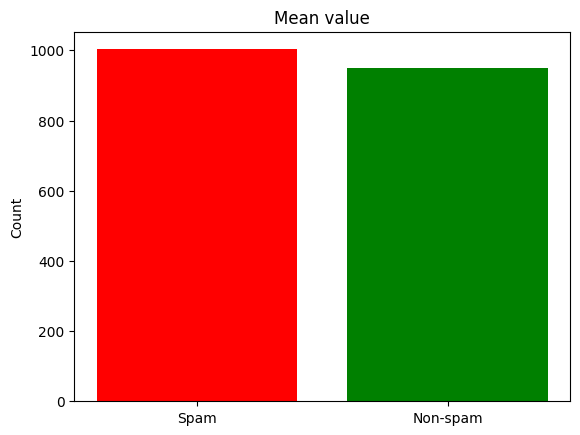

In [118]:
spam_cnt = df[df.CLASS == 1].shape[0]
no_spam_cnt = df[df.CLASS == 0].shape[0]

fig, ax = plt.subplots()
ax.bar(['Spam', 'Non-spam'], [spam_cnt, no_spam_cnt], color=['r', 'g'])
ax.set_title('Mean value')
ax.set_ylabel('Count')
fig.show()

#### Выводы: данные представлены хорошо, дизбаланса нет

### 3. Model preparation

In [119]:
X = df.CONTENT
Y = df.CLASS
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1562,)
(391,)
(1562,)
(391,)


Преобразование коллекции текстовых документов(значений CONTENT(комментария)) в матрицу признаков на основе частотности слов в документах. Документ - клеточка CONTEXT.

In [121]:
count_vec = CountVectorizer(stop_words="english",lowercase=True, analyzer='word')

In [122]:
count_vec.fit(X_train)

CountVectorizer(stop_words='english')

In [123]:
count_vec.get_feature_names_out()

array(['00', '000', '002', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

создание матрицы признаков, где
строка - 1 документ,
столбец - одно слово из набора документов
значение ячейки - количество вхождений слова в этот документ

In [124]:
X_train_cVec = count_vec.fit_transform(X_train)
X_train_cVec

<1562x3672 sparse matrix of type '<class 'numpy.int64'>'
	with 12527 stored elements in Compressed Sparse Row format>

In [125]:
print(X_train_cVec)

  (0, 1569)	1
  (0, 779)	2
  (0, 1272)	1
  (0, 3517)	1
  (0, 713)	1
  (0, 2231)	3
  (0, 841)	3
  (0, 2109)	1
  (0, 2230)	1
  (0, 2399)	1
  (0, 3076)	1
  (0, 3581)	1
  (0, 1663)	1
  (0, 3277)	1
  (0, 2113)	1
  (0, 1)	1
  (0, 2237)	1
  (0, 3455)	1
  (0, 3513)	1
  (0, 1766)	2
  (0, 2883)	1
  (0, 3552)	1
  (0, 3224)	1
  (0, 2414)	1
  (0, 1700)	1
  :	:
  (1561, 1098)	1
  (1561, 3299)	1
  (1561, 2008)	1
  (1561, 3625)	1
  (1561, 2732)	1
  (1561, 2614)	1
  (1561, 3419)	1
  (1561, 2673)	1
  (1561, 1305)	1
  (1561, 2765)	1
  (1561, 470)	1
  (1561, 63)	1
  (1561, 2211)	1
  (1561, 2167)	1
  (1561, 3229)	1
  (1561, 2544)	1
  (1561, 1063)	1
  (1561, 3244)	1
  (1561, 1941)	1
  (1561, 175)	1
  (1561, 3202)	1
  (1561, 942)	1
  (1561, 489)	1
  (1561, 734)	1
  (1561, 1976)	1


In [126]:
X_test_cVec = count_vec.transform(X_test)
X_test_cVec

<391x3672 sparse matrix of type '<class 'numpy.int64'>'
	with 2569 stored elements in Compressed Sparse Row format>

### 4. Naive Bayes

In [127]:
nb_model = MultinomialNB()

In [128]:
nb_model.fit(X_train_cVec, Y_train)

MultinomialNB()

In [129]:
predict = nb_model.predict(X_test_cVec)

In [130]:
print(confusion_matrix(Y_test, predict))

[[165  26]
 [ 13 187]]


In [131]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       191
           1       0.88      0.94      0.91       200

    accuracy                           0.90       391
   macro avg       0.90      0.90      0.90       391
weighted avg       0.90      0.90      0.90       391



### 5. Nn-LSTM

Немного другой подход к представлению данных для обучения.
1. Разбиение на слова с помощью Tokenizer, выбираем 1000 наиболее встречаемых
2. Создание словаря на основе наших комментариев. Каждому слову присваивается индекс
3. Получение списка чисел, где каждое число - индекс

In [132]:
tok_train = Tokenizer(num_words=1000)
tok_train.fit_on_texts(X_train)
seq_train = tok_train.texts_to_sequences(X_train)

Дополнение последовательности нулями или обрезание до 150
каждая строка матрицы - последовательность индексов слов.

In [133]:
seq_train_mat = pad_sequences(seq_train, maxlen=150)

In [134]:
tok_test = Tokenizer(num_words=1000)
tok_test.fit_on_texts(X_test)
seq_test = tok_train.texts_to_sequences(X_test)

In [135]:
seq_test_mat = pad_sequences(seq_test, maxlen=150)

Рекурентная нейронная сеть с заданными слоями:
1. Embedding - слой векторного представления слов. Вектор длины 1000 - размер словаря, 32 - размерность вектора каждого слова, 150 - максимальная длина текста
2. Слой с 64 открытыми состояниями. Позволяет запоминать и использовать инфу с прошлых состояний.
3. Dense - полносвязный слой. Принимает выходы предыдущего и возвращает значение от 0 до 1, sigmoid - для преобразования выходных значений в вероятности.
* Sequental - слои располагаются друг за другом в едином потоке.

In [136]:
lstm_model = Sequential([
    layers.Embedding(input_dim=1000, output_dim=32, input_length=150),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

2023-04-27 23:20:49.361091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 23:20:49.362289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 23:20:49.363119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [137]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 32)           32000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 56,897
Trainable params: 56,897
Non-trainable params: 0
_________________________________________________________________


Обучение модели с конфигурацией: функция потерь - для бинарной классификации, метод оптимизации(обновления весов, смещения, метод - градиентная функция потерь)
128 - количество примеров, которые используются для одного шага обновления весов.
5 - количество эпох. - один проход по всем примерам

In [138]:
lstm_model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(), metrics=['accuracy'])
lstm_model.fit(seq_train_mat, Y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5


2023-04-27 23:20:49.577468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 23:20:49.579148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 23:20:49.580266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 2s 83ms/step - loss: 0.6836 - accuracy: 0.6381 - val_loss: 0.6646 - val_accuracy: 0.6613
Epoch 2/5


2023-04-27 23:20:51.319229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 23:20:51.320278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 23:20:51.320994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 1s 55ms/step - loss: 0.6407 - accuracy: 0.6733 - val_loss: 0.5917 - val_accuracy: 0.6677
Epoch 3/5
10/10 [==============================] - 1s 53ms/step - loss: 0.5629 - accuracy: 0.7382 - val_loss: 0.5152 - val_accuracy: 0.8019
Epoch 4/5
10/10 [==============================] - 1s 56ms/step - loss: 0.4864 - accuracy: 0.8094 - val_loss: 0.4517 - val_accuracy: 0.8051
Epoch 5/5
10/10 [==============================] - 1s 58ms/step - loss: 0.3943 - accuracy: 0.8671 - val_loss: 0.3746 - val_accuracy: 0.8882


In [139]:
predict = lstm_model.predict(seq_test_mat)

 6/13 [============>.................] - ETA: 0s

2023-04-27 23:20:53.857090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-27 23:20:53.858042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-27 23:20:53.858767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 [==============================] - 0s 10ms/step


In [140]:
pr = (predict > 0.5).astype(int)
print(classification_report(Y_test, pr))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       191
           1       0.88      0.95      0.92       200

    accuracy                           0.91       391
   macro avg       0.92      0.91      0.91       391
weighted avg       0.92      0.91      0.91       391

